<a href="https://colab.research.google.com/gist/jonkrohn/9d8802220a065efdaa8d3000a73c403c/big-o-notation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big O Notation

In [2]:
import time

#### Constant Time

In [3]:
def take_first(my_list):
  return my_list[0]

In [4]:
short_list = [13, 25, 42]

In [5]:
tic = time.time()
first = take_first(short_list)
toc = time.time()

In [6]:
first

13

In [7]:
toc-tic

4.00543212890625e-05

In [18]:
long_list = [42] * 10**6 # one hundred million items

In [19]:
len(long_list)

1000000

In [10]:
tic = time.time()
first = take_first(long_list)
toc = time.time()

In [11]:
first

42

In [25]:
toc-tic

4.76837158203125e-07

In [26]:
list_lengths = [10**l for l in range(1, 6)]
list_lengths

[10, 100, 1000, 10000, 100000]

In [27]:
constant_times = []

for l in list_lengths:
  lst = [42]*l
  
  tic = time.time()
  x = take_first(lst)
  toc = time.time()
  
  constant_times.append(toc-tic)

In [28]:
import pandas as pd

In [29]:
constant_df = pd.DataFrame(list(zip(list_lengths, constant_times)), columns=['N', 'time'])
constant_df

,N,time
0,10,1.668930e-06
1,100,4.768372e-07
2,1000,4.768372e-07
3,10000,4.768372e-07
4,100000,7.152557e-07


#### Linear Time

In [30]:
def find_max(my_list):
  max_value = my_list[0]
  for i in range(len(my_list)):
    if my_list[i] > max_value:
      max_value = my_list[i]
  return max_value

In [31]:
tic = time.time()
largest = find_max(short_list)
toc = time.time()

In [32]:
largest

42

In [33]:
toc-tic

4.410743713378906e-05

In [35]:
tic = time.time()
largest = find_max(long_list)
toc = time.time()

In [36]:
largest

42

In [37]:
toc-tic

0.0445859432220459

In [39]:
linear_times = []

for l in list_lengths:
  lst = [42]*l
  
  tic = time.time()
  x = find_max(lst)
  toc = time.time()
  
  linear_times.append(toc-tic)

In [40]:
linear_df = pd.DataFrame(list(zip(list_lengths, linear_times)), columns=['N', 'time'])
linear_df

,N,time
0,10,0.000004
1,100,0.000005
2,1000,0.000049
3,10000,0.000482
4,100000,0.004997


In [41]:
import seaborn as sns

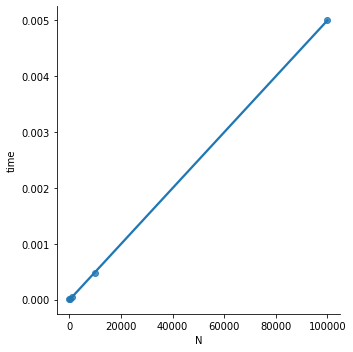

In [42]:
_ = sns.lmplot(x='N', y='time', data=linear_df, ci=None)

#### Polynomial Time

In [43]:
def element_multiplier(my_list): 
  for i in range(len(my_list)):
    for j in range(len(my_list)):
      x = my_list[i] * my_list[j]

In [44]:
list_lengths

[10, 100, 1000, 10000, 100000]

In [45]:
list_lengths[:4] # compute time gets annoyingly long from list_lengths[5] onward

[10, 100, 1000, 10000]

In [46]:
granular_list_lengths = list_lengths[:4] + [50, 500, 5000]
granular_list_lengths

[10, 100, 1000, 10000, 50, 500, 5000]

In [47]:
granular_list_lengths.sort()

In [48]:
granular_list_lengths

[10, 50, 100, 500, 1000, 5000, 10000]

In [49]:
poly_times = []

for l in granular_list_lengths:
  lst = [42]*l

  tic = time.time()
  x = element_multiplier(lst)
  toc = time.time()

  poly_times.append(toc-tic)

In [50]:
poly_df = pd.DataFrame(list(zip(granular_list_lengths, poly_times)), columns=['N', 'time'])
poly_df

,N,time
0,10,0.000012
1,50,0.000143
2,100,0.000618
3,500,0.015773
4,1000,0.060207
5,5000,1.544962
6,10000,6.096379


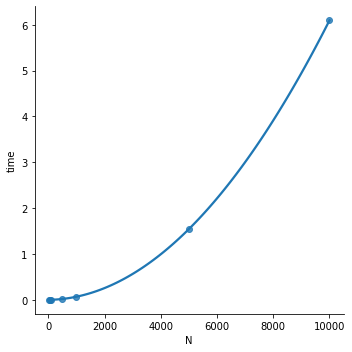

In [51]:
_ = sns.lmplot(x='N', y='time', data=poly_df, ci=None, order=2)

 #### In Big O notation: 

 * constant: O(1)
 * linear: O(N)
 * polynomial: O(N**2) 
 

 #### Others

* logarithmic: O(log N)
* exponential: O(2**N)
* O(N log N)
* O(N!) 

In [53]:
import functools

def time_it(func):
    """ Calculate the execution time of a method and return it back"""
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        duration = time.time() - start

        print(f"Duration of {func.__name__} function was {duration}.")
        return result
    return wrapper

In [54]:
@time_it
def element_multiplier(my_list): 
  for i in range(len(my_list)):
    for j in range(len(my_list)):
      x = my_list[i] * my_list[j]

In [63]:
element_multiplier([56]*10**3)

Duration of element_multiplier function was 0.0635533332824707.


In [59]:
"""
Notes:
Create a list of items N
Output the time(s) running the function with N elements 
plot N vs time. 
"""

None
